# Create K-means clustering algorithm for Mechanical Properties

### Data Cleaning for JARVIS Dataset

In [3]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False
print(jarvis_data_lst[10])

27      0.196
28      0.039
30       0.78
35      0.372
36      0.866
        ...  
2857    2.104
2864    0.184
2873    2.101
2874    0.121
2883    0.211
Name: spillage, Length: 363, dtype: object


### Data Preprocessing for Materials Project Mechanical Properties (Elastic Modulus, Poisson Ratio, Bulk Modulus, Shear Modulus)

In [5]:
import numpy as np

X = np.loadtxt("C:/Users/monia/Downloads/mechanical_properties.csv", delimiter=",")
print(X)

[[ 1.96844977e+02 -6.40335209e+06  1.77176819e+03 -1.00013835e+00]
 [ 1.38196495e+02  1.49685986e+02  3.29935850e+02  1.02093320e-01]
 [ 2.48940448e+02  1.79960050e+02  4.35047599e+02  2.08733821e-01]
 ...
 [ 5.19396764e+07  5.94234629e+06  1.71721579e+07  4.44897109e-01]
 [ 1.66139755e+02  8.73349648e+01  2.22940408e+02  2.76352537e-01]
 [ 1.73264042e+02  8.68106114e+01  2.23161566e+02  2.85335758e-01]]


In [6]:
print(X[:,3])

[-1.00013835  0.10209332  0.20873382 ...  0.44489711  0.27635254
  0.28533576]


In [7]:
df = pd.read_csv("C:/Users/monia/Downloads/mechanical_prop_vis.csv")

print(df.iloc[0,4])
print(len(df))
#output: -6403355.558

-1.000138347
2911


### Data Preprocessing for JARVIS Dataset (dielectric Properties (trace of 3x3 matrix), Formation energy, band gap)

In [9]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False


### Data Preprocessing for JARVIS Dataset (Bulk Modulus (k), Shear Modulus (G), Young Modulus (E), Poisson's Ratio (v)

In [11]:
import csv
import numpy as np
import pandas as pd

jarvis_data = pd.read_csv("C:/Users/monia/Downloads/all_filtered_materials.csv", delimiter=",")

n = 0
jarvis_data_lst = []
result = True

while result:
    if n <= 65:
        column_data = jarvis_data.iloc[:, n].replace("na", np.nan).dropna()  # Convert "NA" to NaN, then drop
        jarvis_data_lst.append(column_data)
        n += 1
    else:
        result = False


In [12]:
import pandas as pd
import ast

# --- Your original code ---
copy_jarvis_data = pd.read_csv("C:/Users/monia/Downloads/filtered_materials_copy.csv", delimiter=",")

k = 0
jarvis_elastic_data = []
jarvis_material = []
resul = True

while resul:
    if k < 2893:
        elastic_data = copy_jarvis_data.iloc[k,11]
        jarvis_material_data = copy_jarvis_data.iloc[k, 0]
        jarvis_elastic_data.append(elastic_data)
        jarvis_material.append(jarvis_material_data)
        k += 1
    else:
        resul = False

jarvis_elastic_dic = {}

l = 0 
for i in jarvis_elastic_data:
    jarvis_elastic_dic[jarvis_material[l]] = jarvis_elastic_data[l]
    l += 1

jarvis_elastic_dic = {key: value for key, value in jarvis_elastic_dic.items() if value not in [None, "na", "Na", "NA"]}

# --- New part: Expand tensor and save CSV ---
expanded_data = []

for material, tensor_str in jarvis_elastic_dic.items():
    try:
        tensor = ast.literal_eval(tensor_str)  # safely convert string to list
        flat_tensor = [item for sublist in tensor for item in sublist]  # flatten 6x6

        if len(flat_tensor) == 36:
            row = {"Material": material}
            for i in range(6):
                for j in range(6):
                    row[f"c{i+1}{j+1}"] = tensor[i][j]
            expanded_data.append(row)
    except:
        continue  # skip any tensors that can't be parsed

expanded_df = pd.DataFrame(expanded_data)
expanded_df.to_csv("C:/Users/monia/Downloads/jarvis_elastic_tensor_expanded.csv", index=False)

print("Expanded tensor CSV saved successfully.")


Expanded tensor CSV saved successfully.


In [13]:
material_data_df = pd.read_csv("C:/Users/monia/Downloads/jarvis_elastic_tensor_expanded_copy.csv", delimiter=",")
print(material_data_df.iloc[:,37])
print(material_data_df.iloc[:,38])
print(material_data_df.iloc[:,39])
print(material_data_df.iloc[:,40])

0        222.2444444
1        210.2555556
2        160.5777778
3        69.93333333
4        59.56666667
            ...     
1396     39.78888889
1397     39.82222222
1398     68.95555556
1399     36.33333333
1400    -1.344444444
Name: Bulk Modulus (K), Length: 1401, dtype: object
0        231.8666667
1        203.0733333
2        122.9666667
3              16.76
4               13.9
            ...     
1396     23.63333333
1397     23.63333333
1398     42.65333333
1399            19.4
1400    -2.806666667
Name: Shear Modulus (G), Length: 1401, dtype: object
0        516.1136286
1        460.8506052
2        293.8836227
3        46.56048729
4        38.69049844
            ...     
1396     59.18249417
1397     59.19068251
1398     106.0863204
1399     49.40654206
1400    -4.965009747
Name: Young Modulus (E), Length: 1401, dtype: object
0        0.112953483
1        0.134690108
2        0.194972714
3        0.389036017
4        0.391744548
            ...     
1396     0.252097902
13

### Data Preprocessing for Jarvis Dataset

In [15]:
print(jarvis_data_lst[4])

0       0.02302
1       0.02302
2       0.75634
3       0.00000
4       0.27263
         ...   
2890   -1.20420
2891   -1.21066
2892   -0.49444
2893   -0.20563
2894    1.45911
Name: formation_energy_peratom, Length: 2895, dtype: float64


In [16]:
import pandas as pd

# Prepare JDP list
JDP = [
    jarvis_data_lst[4],
    jarvis_data_lst[6],
    jarvis_data_lst[18],  # JDP[2]
    jarvis_data_lst[19],  # JDP[3]
    jarvis_data_lst[20],  # JDP[4]
    material_data_df.iloc[:, 37],
    material_data_df.iloc[:, 38],
    material_data_df.iloc[:, 39],
    material_data_df.iloc[:, 40],
]

# Convert to DataFrame for vectorized computation
df_1 = pd.DataFrame({
    'val1': JDP[2],
    'val2': JDP[3],
    'val3': JDP[4]
})

df_1 = df_1.astype(float)

trace_data = (df_1['val1'] + df_1['val2'] + df_1['val3'])
JDP.append(trace_data)
print(JDP[9])

0        34.2725
1        34.2723
2         9.3527
3        27.8001
4        65.3579
          ...   
2890     14.6005
2891     13.6865
2892     39.4475
2893    111.1600
2894     20.4797
Length: 2179, dtype: float64


### Materials Project Data Processing and Analysis

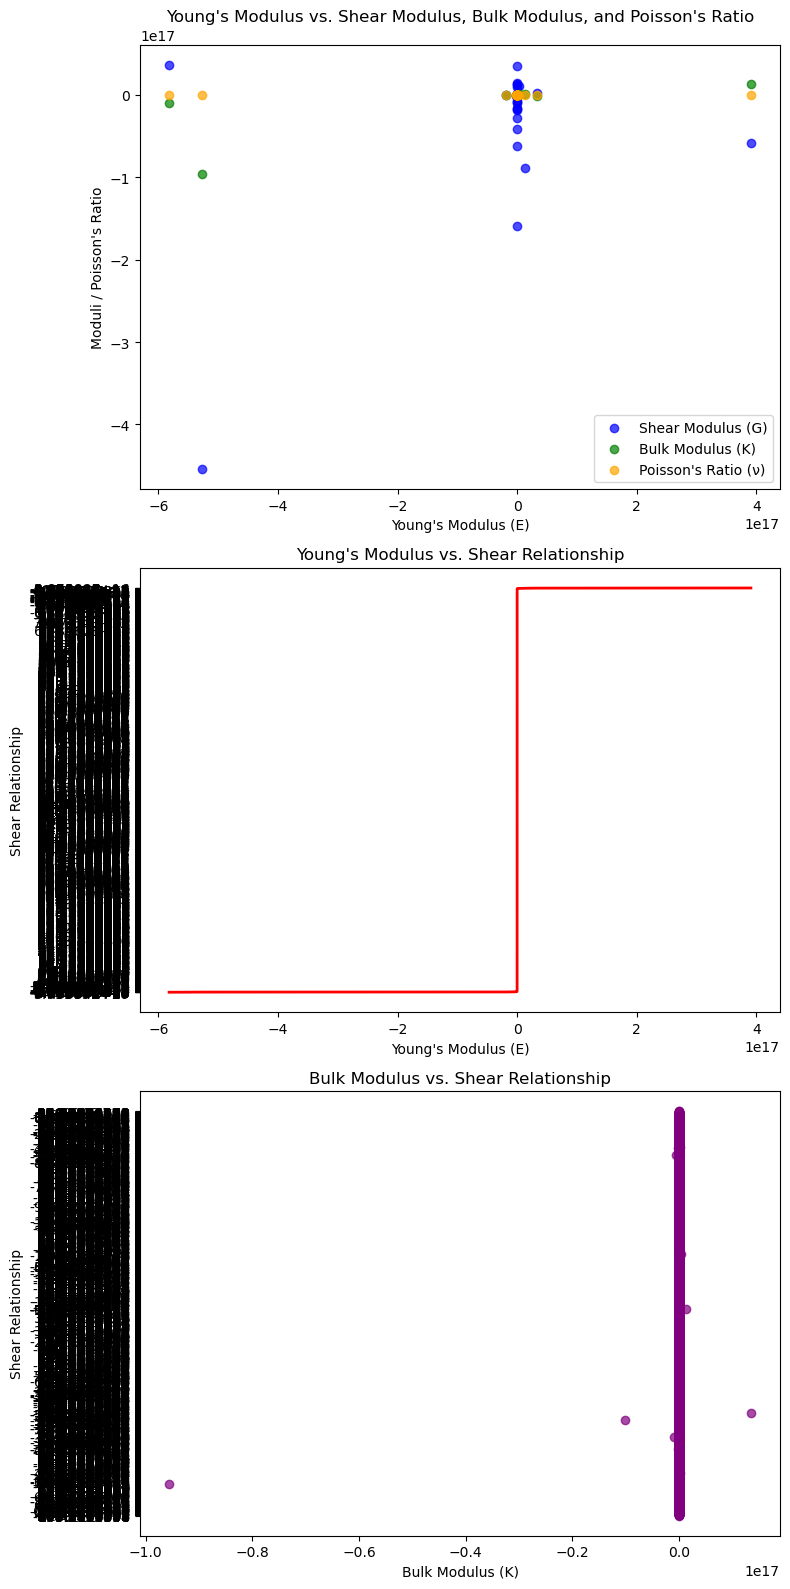

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Extract columns correctly, ensuring not to exceed df's length
num_rows = min(2911, len(df))
bulk_modulus_lst = [df.iloc[n, 1] for n in range(num_rows)]
shear_modulus_lst = [df.iloc[n, 2] for n in range(num_rows)]
young_modulus_lst = [df.iloc[n, 3] for n in range(num_rows)]
poisson_ratio_lst = [df.iloc[n, 4] for n in range(num_rows)]
shear_rela_lst = [df.iloc[n, 5] for n in range(num_rows)]

# Sort data for continuous line plot
sorted_pairs = sorted(zip(young_modulus_lst, shear_rela_lst))
young_sorted, shear_rela_sorted = zip(*sorted_pairs)

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(8, 16))  # 3 rows, 1 column

# 1. Combined Scatter Plot
ax[0].scatter(young_modulus_lst, shear_modulus_lst, color='blue', alpha=0.7, label="Shear Modulus (G)")
ax[0].scatter(young_modulus_lst, bulk_modulus_lst, color='green', alpha=0.7, label="Bulk Modulus (K)")
ax[0].scatter(young_modulus_lst, poisson_ratio_lst, color='orange', alpha=0.7, label="Poisson's Ratio (ν)")
ax[0].set_xlabel("Young's Modulus (E)")
ax[0].set_ylabel("Moduli / Poisson's Ratio")
ax[0].set_title("Young's Modulus vs. Shear Modulus, Bulk Modulus, and Poisson's Ratio")
ax[0].legend()

# 2. Young’s Modulus vs. Shear Relationship (Sorted Line)
ax[1].plot(young_sorted, shear_rela_sorted, color='red', linewidth=2)
ax[1].set_xlabel("Young's Modulus (E)")
ax[1].set_ylabel("Shear Relationship")
ax[1].set_title("Young's Modulus vs. Shear Relationship")

# 3. Bulk Modulus vs. Shear Relationship
ax[2].scatter(bulk_modulus_lst, shear_rela_lst, color='purple', alpha=0.7)
ax[2].set_xlabel("Bulk Modulus (K)")
ax[2].set_ylabel("Shear Relationship")
ax[2].set_title("Bulk Modulus vs. Shear Relationship")

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
new_shear_lst = []
for i in shear_rela_lst:
    try:
        new_shear_lst.append(float(i))  # Convert valid numbers
    except ValueError:
        continue  # Skip invalid values like '#DIV/0!'

while len(new_shear_lst) < len(X):
    new_shear_lst.append(0)  # Append zeros to match X

X = np.column_stack((X, new_shear_lst))
print(X[:,3])


[-1.00013835  0.10209332  0.20873382 ...  0.44489711  0.27635254
  0.28533576]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.max_iters):
            labels = self._assign_labels(X)
            new_centroids = self._update_centroids(X, labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        # Calculate the distance from each point to every centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels):
        # Update centroids by taking the mean of points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids



In [131]:
import numpy as np

# Find the minimum length
min_len = min(len(JDP[7]), len(JDP[1]), len(JDP[5]), len(JDP[6]), len(JDP[0]))

# Zip all feature lists and filter out rows with '#VALUE!' or other non-floats
clean_data = []
for i in range(min_len):
    try:
        row = [
            float(JDP[7][i]),
            float(JDP[1][i]),
            float(JDP[5][i]),
            float(JDP[6][i]),
            float(JDP[0][i])
        ]
        clean_data.append(row)
    except ValueError:
        continue  # Skip rows with invalid values

# Convert to NumPy array
X = np.array(clean_data)

# Print the cleaned and stacked data
print(X[:,4])
print(JDP[9])


[ 0.02302  0.02302  0.75634 ... -2.49762 -2.58935 -2.82176]
0        34.2725
1        34.2723
2         9.3527
3        27.8001
4        65.3579
          ...   
2890     14.6005
2891     13.6865
2892     39.4475
2893    111.1600
2894     20.4797
Length: 2179, dtype: float64


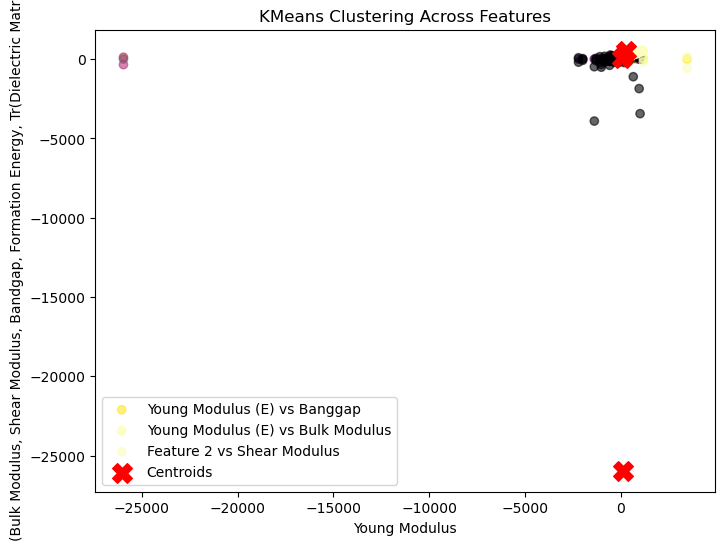

In [133]:
#come to back to this code need fixing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set to the number of logical cores you want


# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create figure with multiple scatter plots in one
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plots for different feature pairs
ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, label="Young Modulus (E) vs Banggap")
ax.scatter(X[:,0], X[:,2], c=labels, cmap='inferno', alpha=0.6, label="Young Modulus (E) vs Bulk Modulus")
ax.scatter(X[:,0], X[:,3], c=labels, cmap='magma', alpha=0.6, label="Feature 2 vs Shear Modulus")
#ax.scatter(X[:,0], X[:,], c=labels, cmap='plasma', alpha=0.6, label="Feature 2 vs Feature 1")
#ax.scatter(X[7], X[0], c=labels, cmap='cividis', alpha=0.6, label="Feature 2 vs Feature 1")


# Plot centroids
ax.scatter(centroids[:, 2], centroids[:, 0], c='red', marker='X', s=200, label="Centroids")

# Labels and legend
ax.set_title("KMeans Clustering Across Features")
ax.set_xlabel("Young Modulus")
ax.set_ylabel("(Bulk Modulus, Shear Modulus, Bandgap, Formation Energy, Tr(Dielectric Matrix)")
ax.legend()
plt.show()
